In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plot style and size defaults
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# 1. Load the dataset
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/02_Data/Telco-Customer-Churn.csv")

In [9]:
# 2. Basic info about data
print("----- Data Info -----")
print(df.info())
print("\n----- Statistical Summary (Numerical) -----")
print(df.describe())

----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [11]:
print("\n----- Sample Data -----")
print(df.head())


----- Sample Data -----
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

In [13]:
# 3. Check missing values
print("\n----- Missing Values -----")
print(df.isnull().sum())


----- Missing Values -----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
# For TotalCharges, convert to numeric and coerce errors (if any)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
# After conversion, check again for missing values
print("\n----- Missing Values After TotalCharges Conversion -----")
print(df.isnull().sum())


----- Missing Values After TotalCharges Conversion -----
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [19]:
# Drop rows with missing TotalCharges (if any)
df = df.dropna(subset=['TotalCharges'])

### 4. Target variable distribution

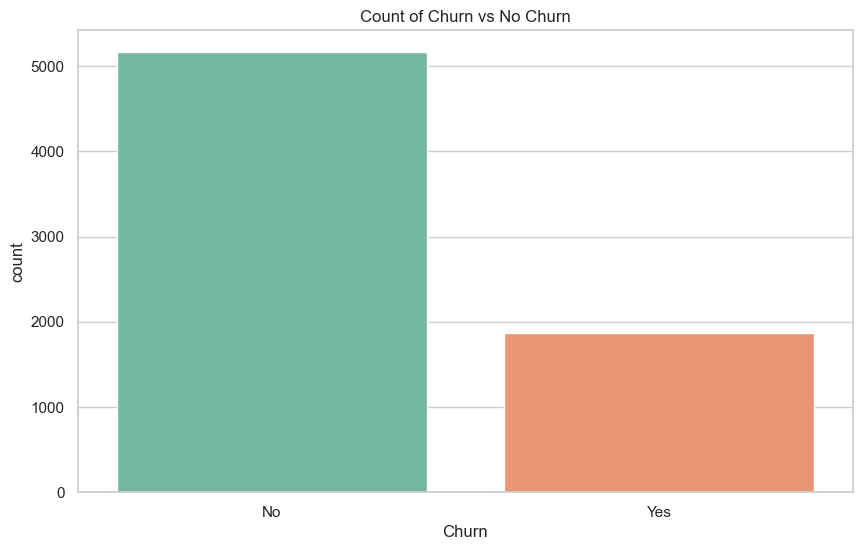

In [26]:
# Countplot for Churn
plt.figure()
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Count of Churn vs No Churn')
plt.show()

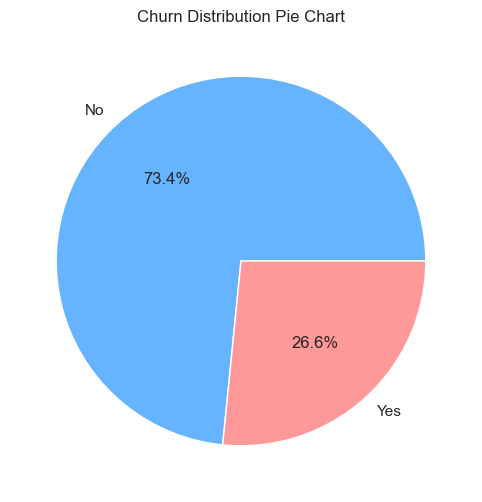

In [28]:
# Pie chart for Churn %
plt.figure()
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution Pie Chart')
plt.ylabel('')
plt.show()

### 5. Distribution of numeric features

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

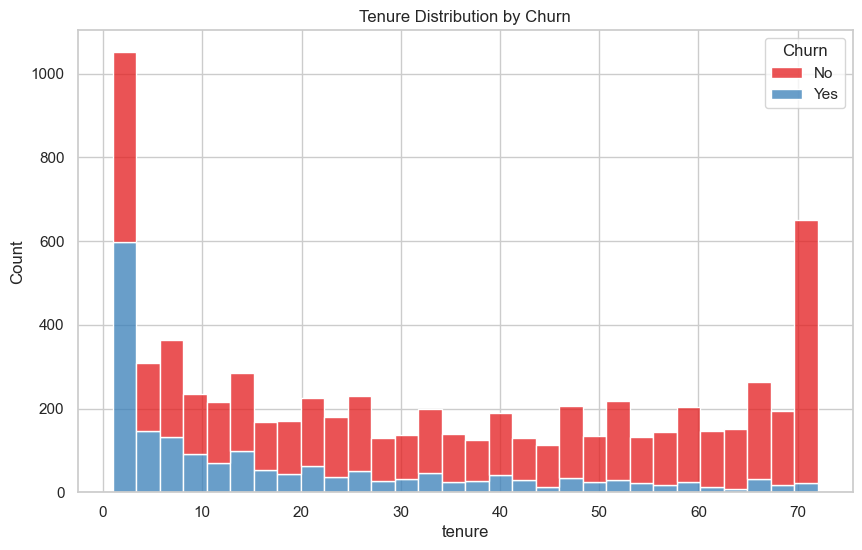

In [31]:
# Histogram of tenure, separated by churn
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='Set1')
plt.title('Tenure Distribution by Churn')
plt.show()

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

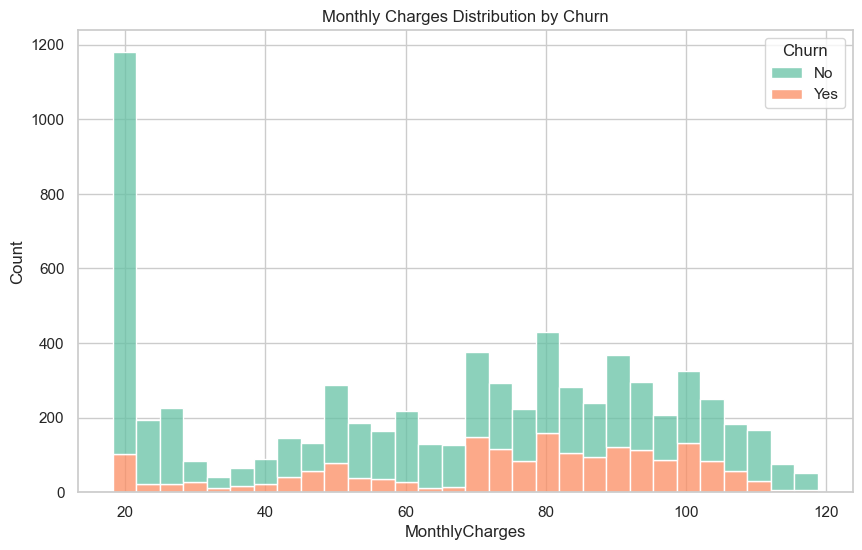

In [33]:
# Histogram of MonthlyCharges by churn
plt.figure()
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette='Set2')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

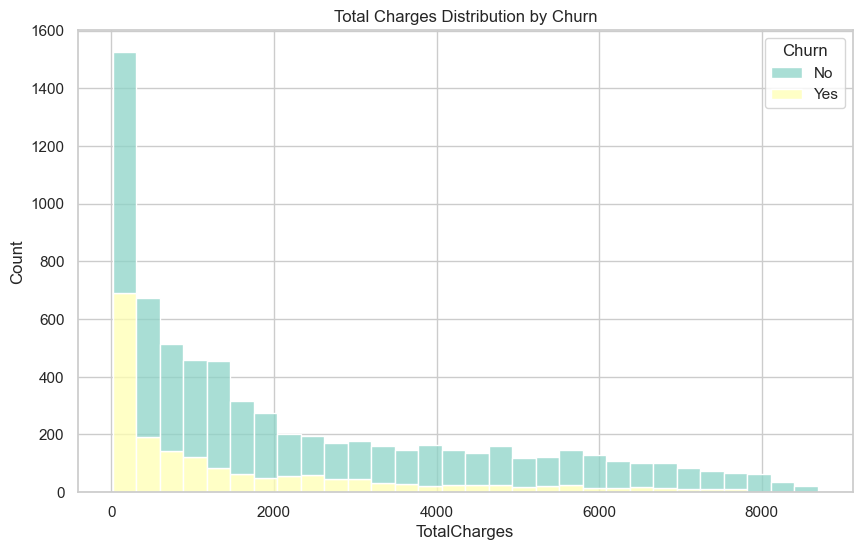

In [35]:
# Histogram of TotalCharges by churn
plt.figure()
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30, palette='Set3')
plt.title('Total Charges Distribution by Churn')
plt.show()

### 6. Boxplots of numeric variables by churn

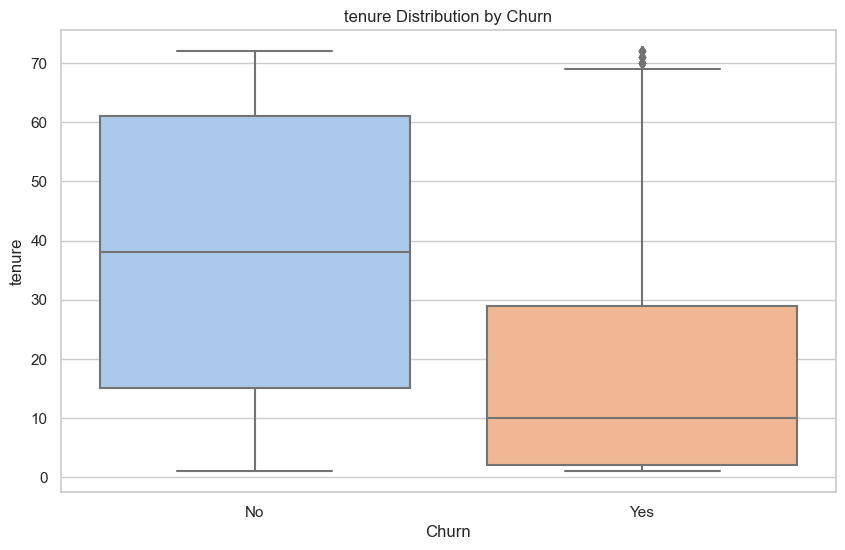

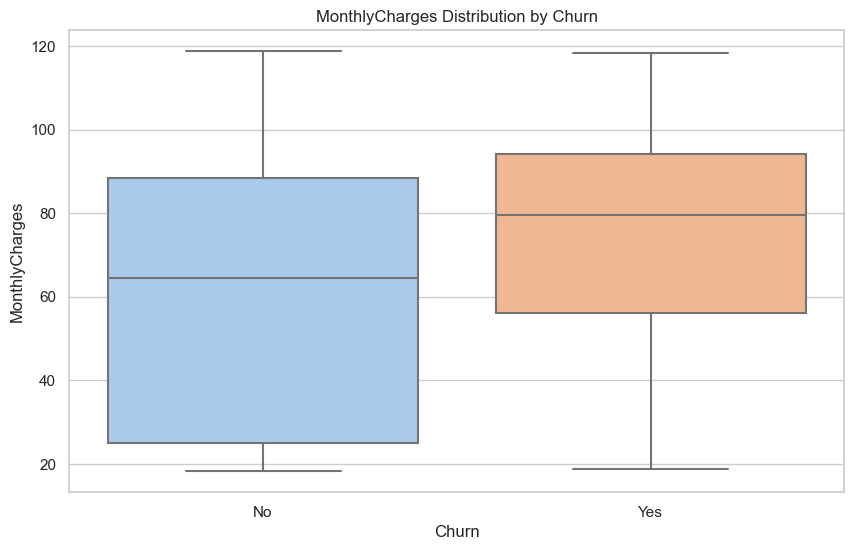

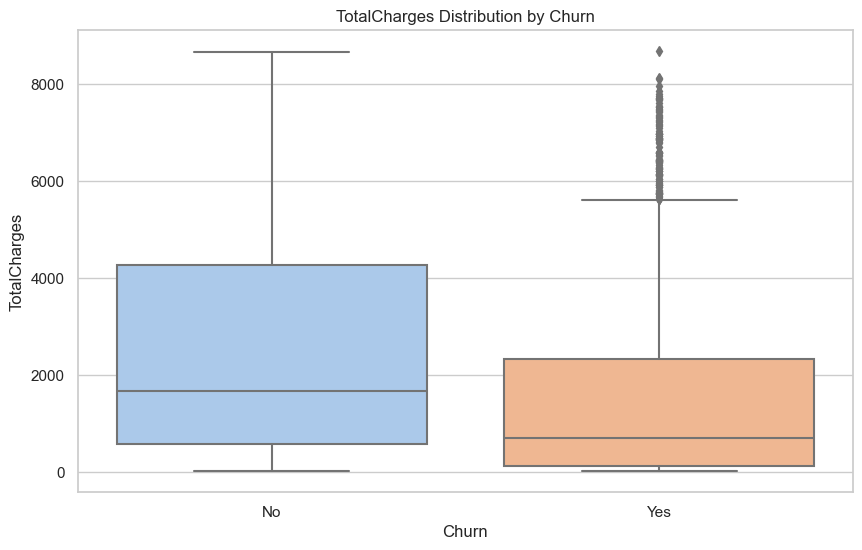

In [38]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} Distribution by Churn')
    plt.show()

### 7. Bar charts for categorical variables

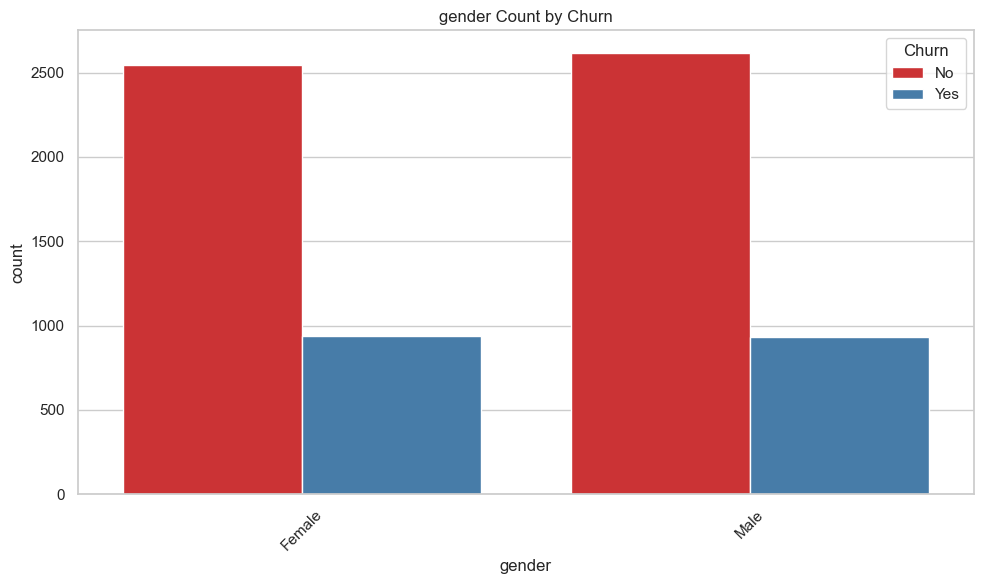

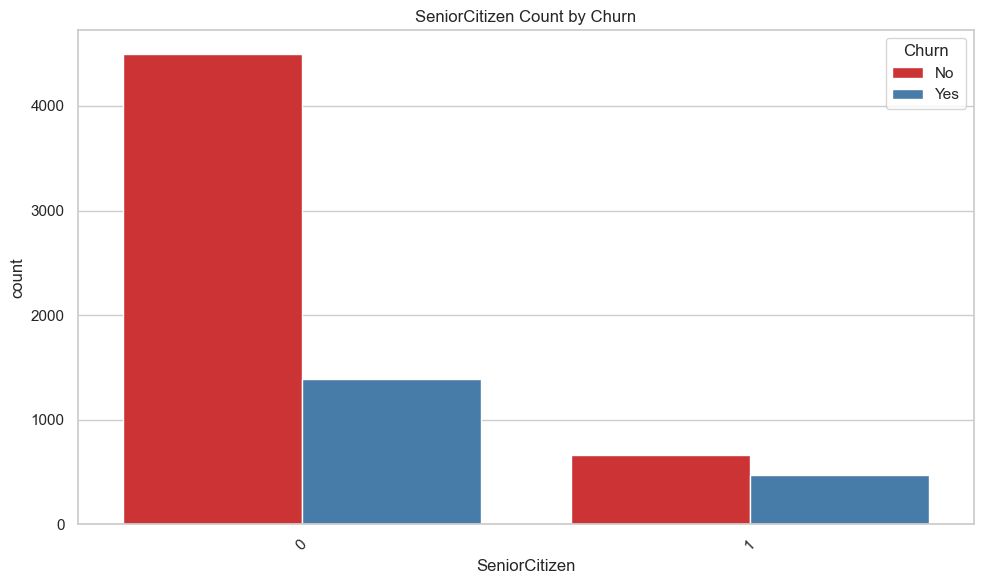

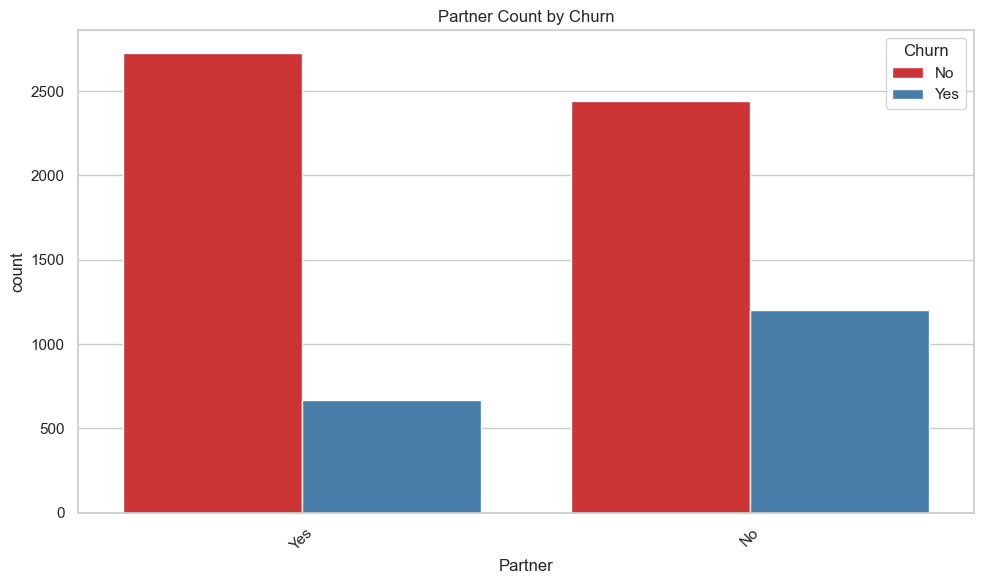

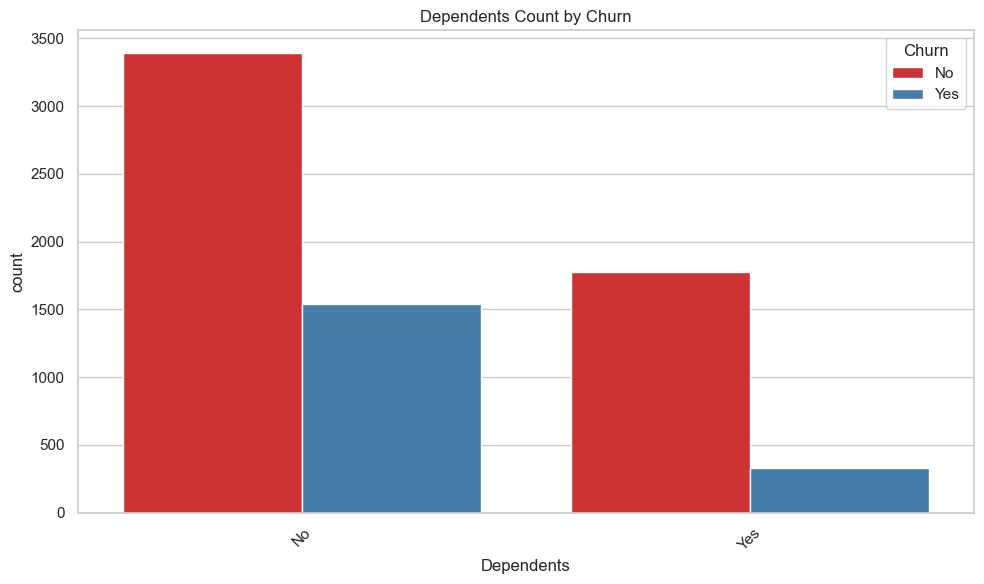

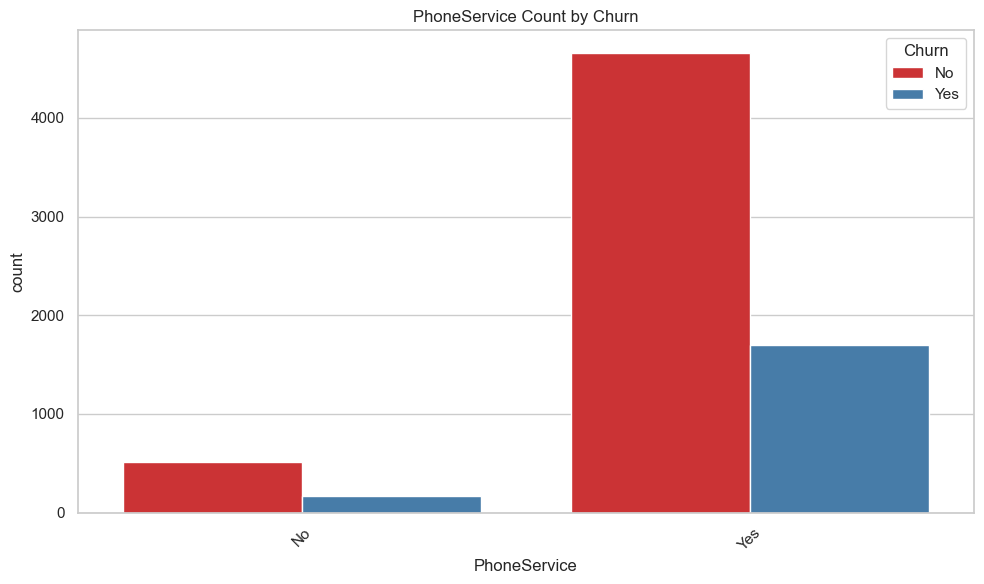

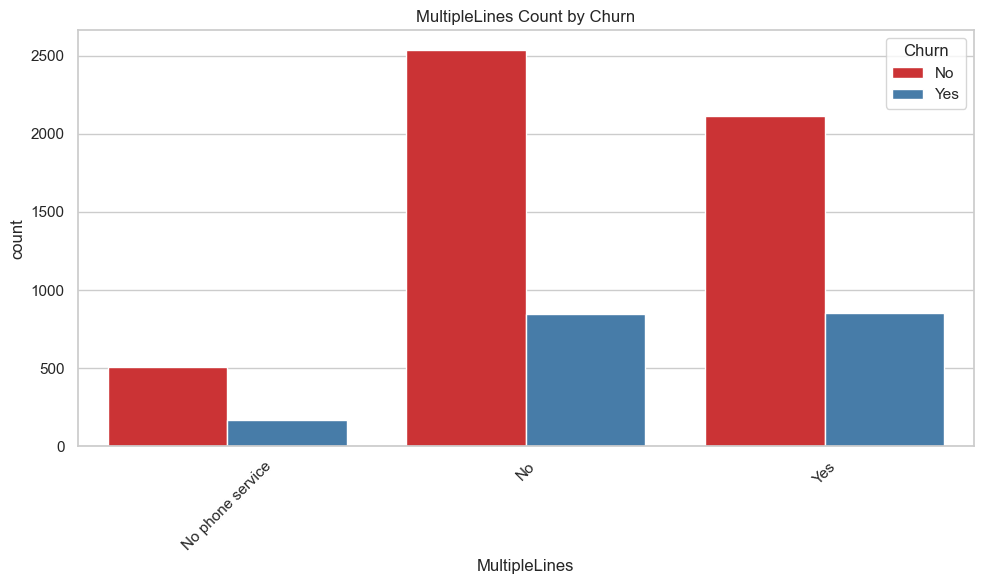

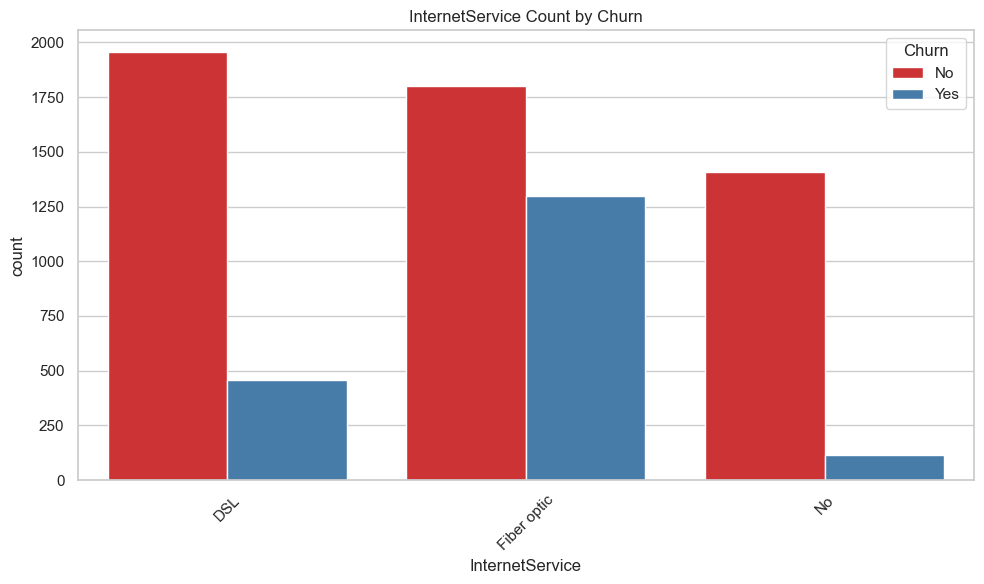

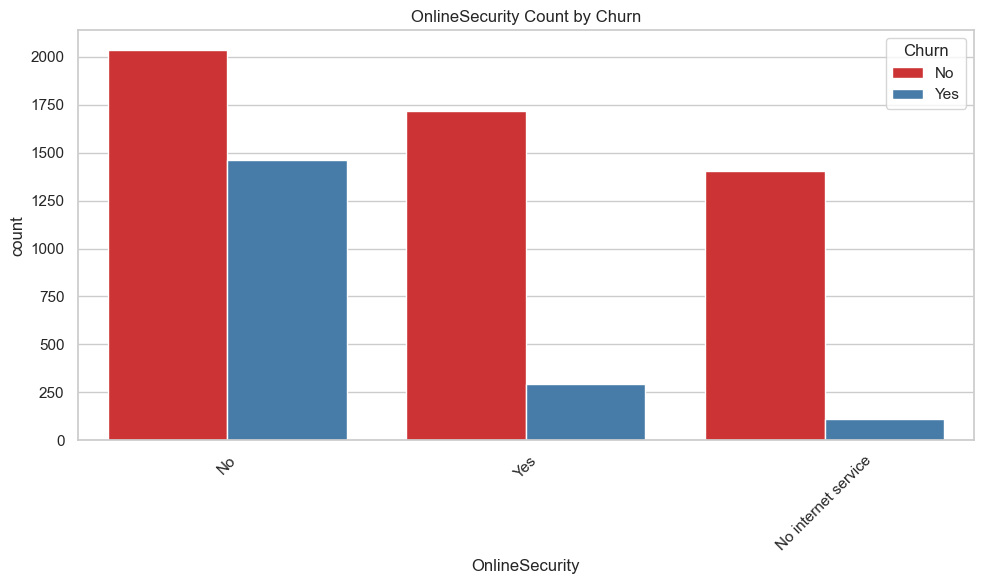

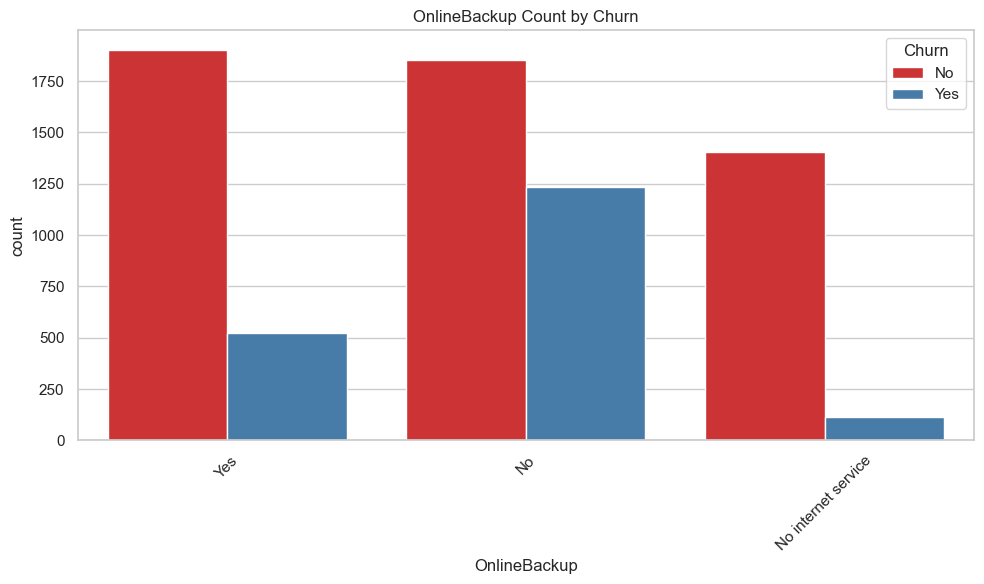

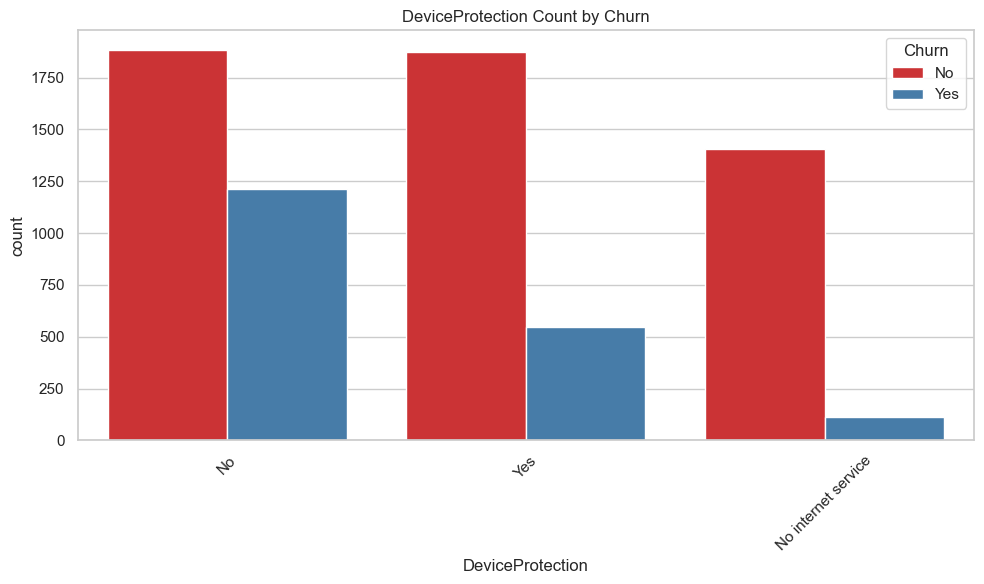

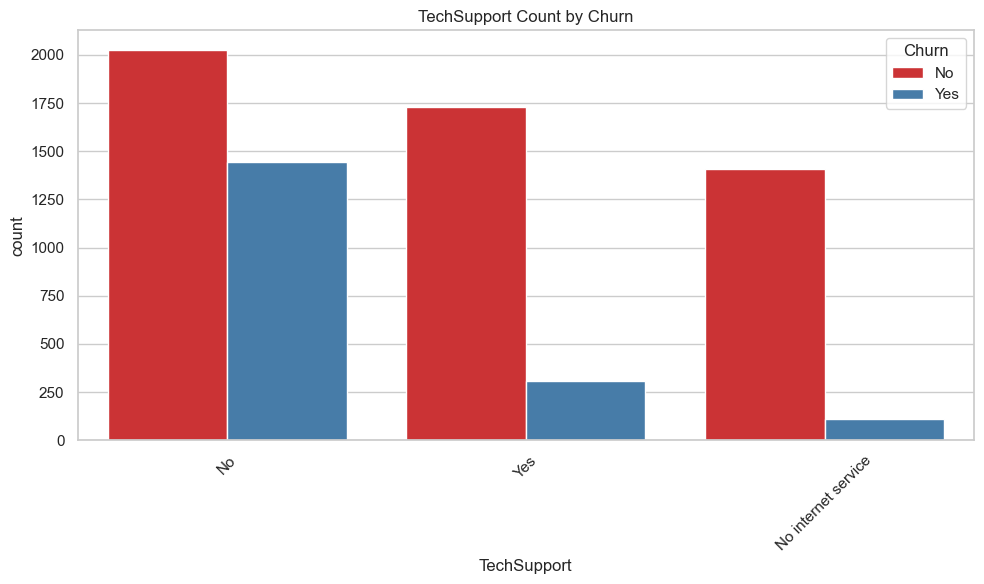

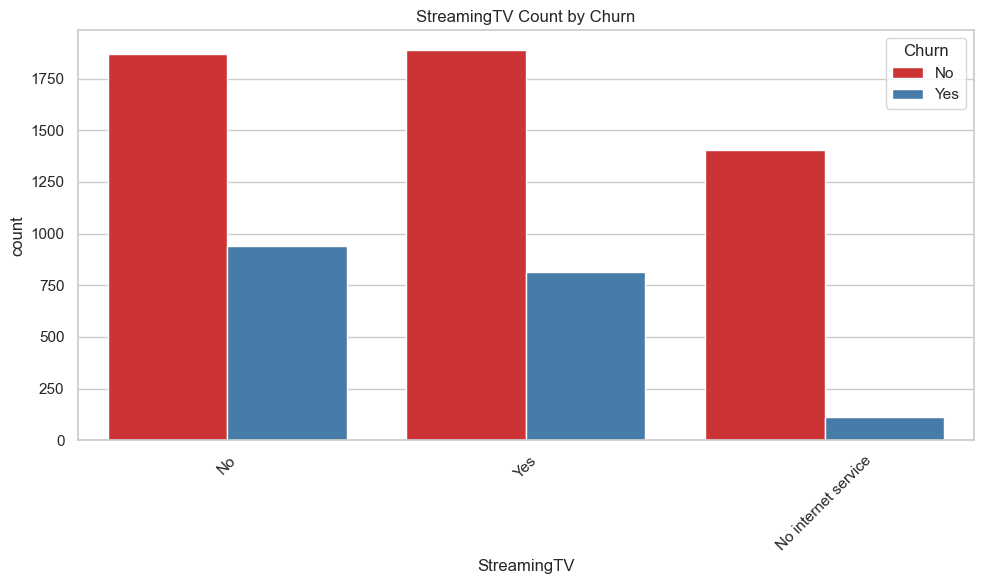

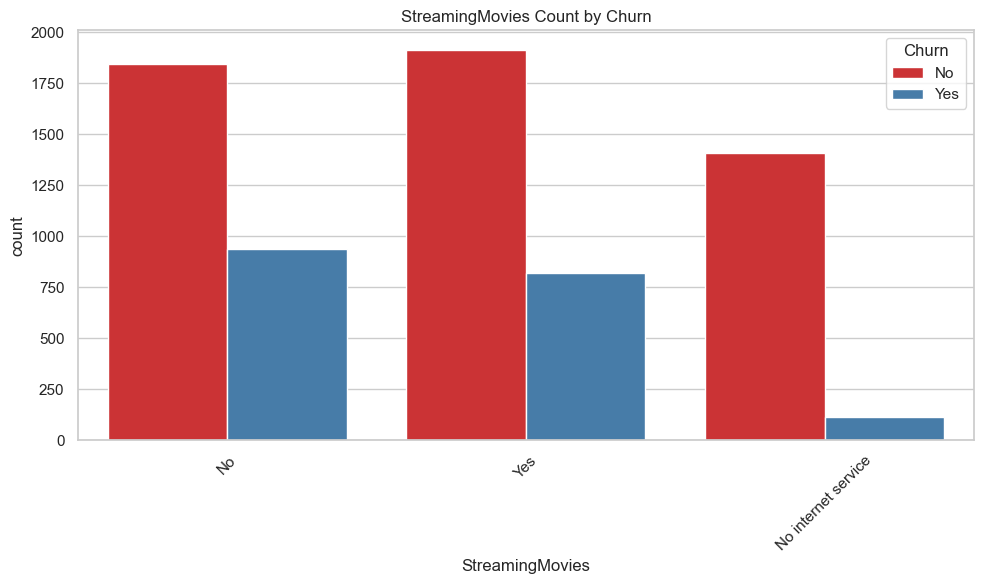

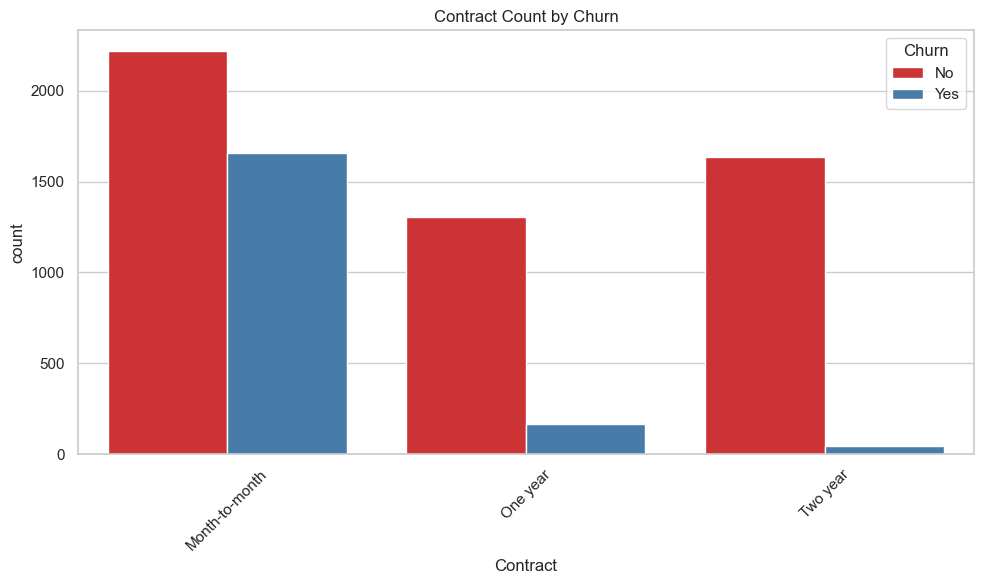

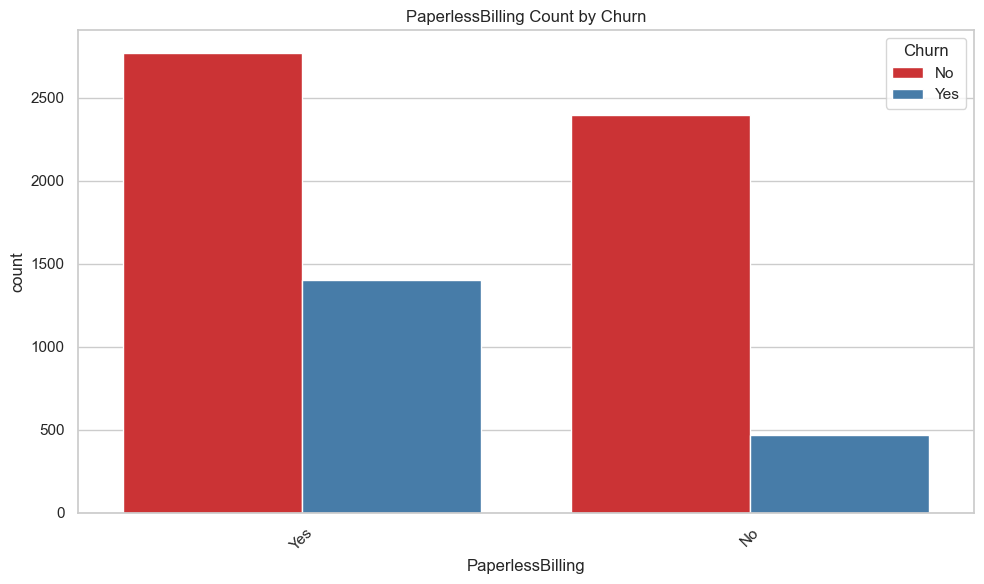

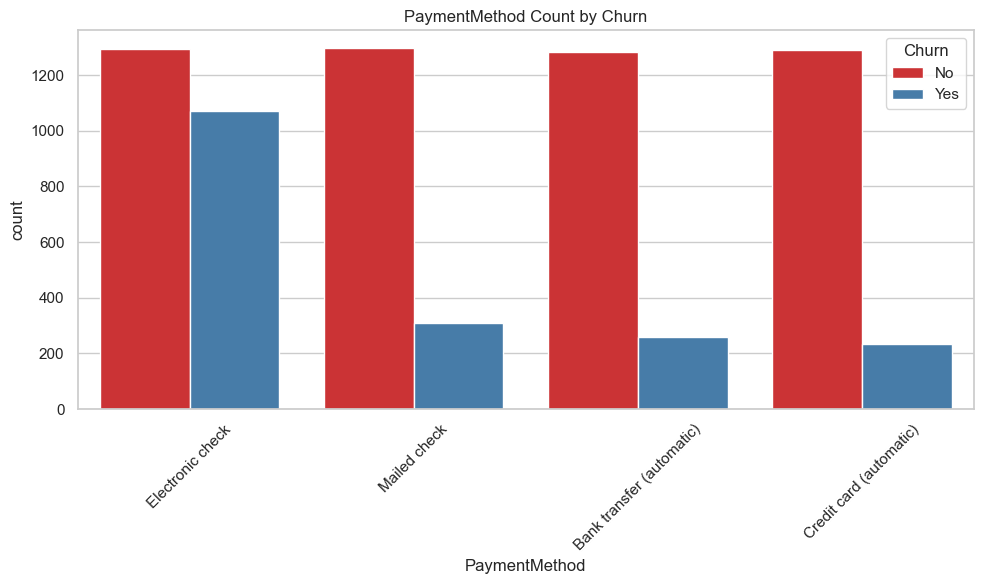

In [41]:
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='Churn', data=df, palette='Set1')
    plt.title(f'{col} Count by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 8. Scatter plot - relationship between MonthlyCharges and TotalCharges colored by churn

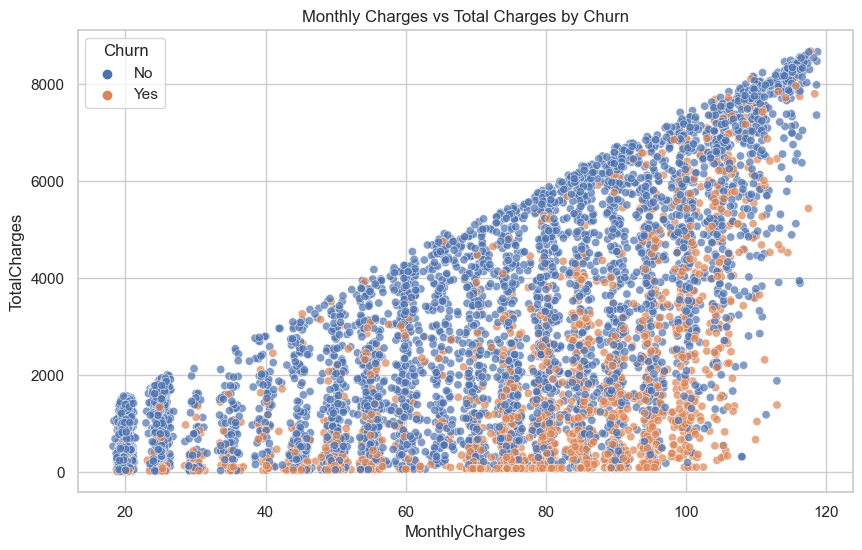

In [47]:
plt.figure()
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, alpha=0.7)
plt.title('Monthly Charges vs Total Charges by Churn')
plt.show()

### 9. Bubble chart - tenure vs MonthlyCharges with TotalCharges as bubble size, color by churn

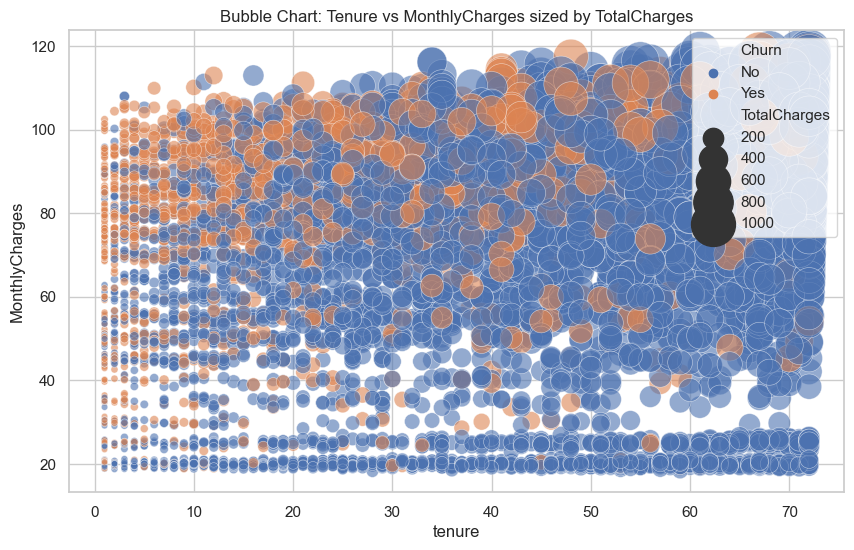

In [50]:
plt.figure()
sizes = df['TotalCharges'] / df['TotalCharges'].max() * 1000  # scale bubble size

sns.scatterplot(x='tenure', y='MonthlyCharges', size=sizes, hue='Churn',
                data=df, alpha=0.6, sizes=(20, 1000), legend='brief')

plt.title('Bubble Chart: Tenure vs MonthlyCharges sized by TotalCharges')
plt.legend(loc='upper right')
plt.show()

### 10. Correlation heatmap of numeric variables

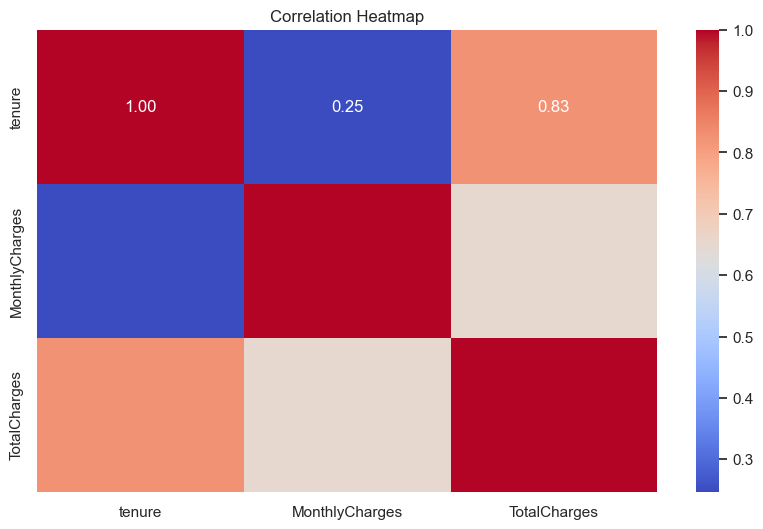

In [53]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure()
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 11. Line plot - average MonthlyCharges over tenure months grouped by churn status

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

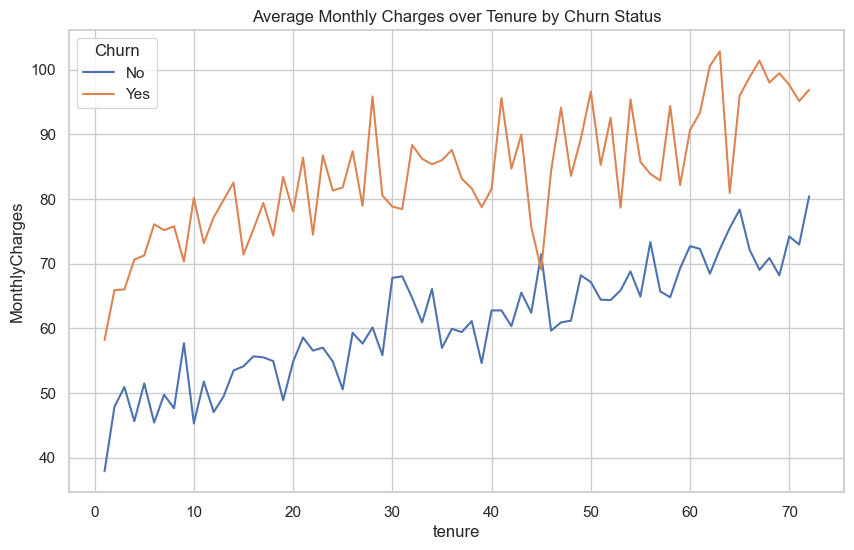

In [56]:
plt.figure()
monthly_avg = df.groupby(['tenure', 'Churn'])['MonthlyCharges'].mean().reset_index()
sns.lineplot(data=monthly_avg, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Average Monthly Charges over Tenure by Churn Status')
plt.show()